# Chapter 6. Decision Trees
* **Decision Trees* are versatile Machine Learning algorithms that can perform both classification and regression tasks, and even multioutput tasks**
* **Decision Trees are also fundamental components of Random Forests**

## Training and Visulizaing a Decision Tree
**Perform a decision tree classifier on the Iris dataset**

In [7]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [8]:
from sklearn.datasets import load_iris

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
iris=load_iris()

In [11]:
X=iris.data[:,2:]#petal width and length

In [12]:
y=iris.target

In [13]:
tree_clf=DecisionTreeClassifier(max_depth=2)

In [14]:
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2)

**You can visualize the trained Decision Tree by first using the** export_graphviz( ) **method to output a graph definition file or view the graph in graphviz**

In [15]:
from sklearn.tree import export_graphviz

In [53]:
dot_data=export_graphviz(
        tree_clf,
        out_file=None,
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True,
        special_characters=True,
    )

In [72]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [73]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [56]:
import graphviz

In [57]:
graph=graphviz.Source(dot_data)

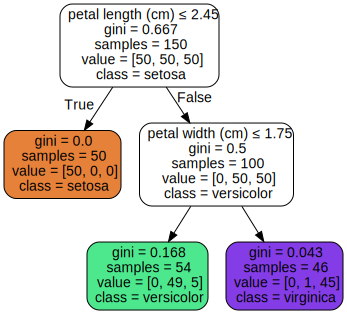

In [58]:
graph

### Making Predictions
1. **Find an iris flower and you want to classify it**
1. **Satrt at the *root node(depth 0, at the top)***
1. **Then you move down to the root's left child node, which makes a predicted class for that node**
1. **In the rigght child node, the node asks another question, is the petal width smaller than 1.75cm**
1. **If so, the flower is most likely an *versicolor*, if not, it is more likely *virginica***
1. **One of the many qualities of Decision Trees is that they require very little data preparation**
1. **A node's** samples **attribute counts how many training instances it applies to. Foe instance, 100 training instances have a petallength greater than 2.45cm.**
1. **A node's** value **attribute tells you how many training instances of each class this node applies to. For example, the bottom right node applies to 0 *Iris setosa, 1 Iris versicolor, and 45 Iris Virginica***
1. **A node's** gini **attribute measures its *impurity:* a node is "pure"(gini=0) if all training instances it applies to belong to the same class. For example, since the depth-1 left node applies only to *Iris Setosa* training instances, it is pure and its** gini **score is 0**
1. **SK-Learn uses the CART algorithm, which produces only *binary trees:* nonleaf nodes have two children(i.e., questions only have yes/no answers)**
1. **Since the lefthand area is pure(only Iris setosa), it cannot be split any further.**
1. **Since** max_depth **was set to 2, the Decision Tree stops right there. If you set the** max_depth **to 3, then the two depth-2 nodes would each add another decision boundary**
1. **Decision Trees are intuitive, and their decisions are easy to interept. Such models are often called *white box models***

## Estimating Class Probabilites
* **A Decision Tree can also estimate the probability that an instance belongs to a particular class k**
* **First it traverses the tree to find the leaf node for this instance, and then it returns the ratio of training instances of class k in this node.**

In [70]:
tree_clf.predict_proba([[5,1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [71]:
tree_clf.predict([[5,1.5]])

array([1])

## The CART Training Algorithm
**SK-Learn uses the *Classification and Regression Tree(CART)* algorithm to train Decision Trees(also called "growing" trees**
* **The algorithm works by first splitting the trainning set into two subsets, using a single feature *k* and a threshold *tk*(e.g., "petal length <=2.45cm")**
* **It searches for the pair(K,tk) that produces the purest subsets**
* **Once the CART algorithm has successfully split the training set into two, it splits the subsets using the same logic**
* **It stops recursuing once it reaches the maximum depth(defined by the** max_depth **hyperparameter*, or it f cannot find a split that will reduce impurity)**
* **CART does not check whether or not the split will lead to the lowest possible impurity several levels down**

## Computational Complexity
**Making predictions requires traversing the Decision Tree from the root to a leaf. Decision trees are approximately balanced, so traversing the Decision Tree requires going through roughly O(log2(m)) nodes**

## Gini Impurity or Entropy
* **By default, the Gini impurity measure is used, but you can select the *entropy* impurity measure instead by setting the** criterion **hyperparameter to** entropy
* **A set's entropy is zero when it contains instances of only one class**
* **Most of the time Gini and Entropy does not make a big difference:they lead to similar trees**
* **Gini impurity is slightly faster to compute, so it is a good default**
* **Gini impurity tends to isolate the most frquent class in its own branch of the tree, while entropy tends to produce a slightly more balanced trees**

## Regularization Hyperparameters
* **Decision Trees make very few assumptoons about the training data**
* **If left unconstrained, the tree structure will adapt itself to the training data, fitting it very closely-indeed, most likely overfitting**
* ***nonparametric model:* the number of parameters is not determined prior to training, so the model structure is free to stick closely to the data**
* ***parametric model:* has a predetermined number of parameters, so its degree of freedom is limited, reducing the risk of overfitting**
* max_depth **Generally you can at least restrict the maximum depth of the Decision Tree, default is** None. **Reducing** max_depth **will regularize the model and reduce the risk of overfitting**
* min_samples_split **:the minimum number of samples a node must have before it can be split**
* min_samples_leaf **:the minimum number of samples a leaf node must have**
* min_weight_fraction_leaf **:same as** min_samples_leaf **but expressed a fraction of the total number of weighted instances**
* max_leaf_nodes: **the maximum number of leaf nodes**
* max_features: **the maximum number of features that are evaluated for splitting a each node**
* **Increasing** min_\* **hyperparamter or reducing** max_\* **hyperparameters will regularize the model**

### Prunning
* **Other algortihms work by first training the Decision Tree without restriction, then *pruning*(deleting) unnecessary nodes**
* **A node whose children are all leaf nodes is considered unnecessary if the purity improvement it provides is not statistically significant(using the chi-squared) test, and check the p-value against the hypothesis**
* **The prunning continues until all unnecessary nodes have been pruned**

## Regression

In [74]:
from sklearn.tree import DecisionTreeRegressor

In [75]:
tree_reg=DecisionTreeRegressor(max_depth=2)

In [76]:
tree_reg.fit(X,y)

DecisionTreeRegressor(max_depth=2)

In [77]:
dot_data=export_graphviz(
        tree_reg,
        out_file=None,
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True,
        special_characters=True,
    )

In [78]:
graph=graphviz.Source(dot_data)

* **Instead of predicting a class in each node, it predicts a value**
* **The predicted value for each region is always the average value of the instances in that region**
* **The algorithm splits each region in a way that makes most training instances as close as possible to that predicted value**
* **The CART algorithm works by trying to split the training set in a way that minimizes the MSE**
* **Decision Trees are prone to overfitting when dealing with regression tasks**

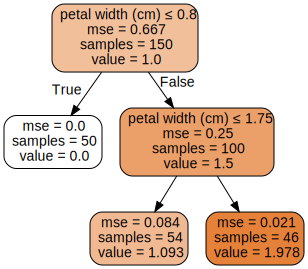

In [80]:
graph

## Instability
* **Decision Trees love orthogonal decision boundaries(all splits are prependicular to an axis), which makes them insensitive to trainning set rotations**
* **One way to limit this problem is to use Principal Component Analysis, which often results in a better orientaton of training**
* **Decision Trees is very sensitive to small variations in the training data**

In [86]:
%%bash
git stash

No local changes to save


In [87]:
%%bash
git status

On branch master
Your branch is up to date with 'origin/master'.

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.DS_Store
	.ipynb_checkpoints/
	Chapter  4 Training Model.docx
	Chapter 5 Support Vector Machines.docx
	bc.ipynb
	bc1.csv
	ch6_decision_tree.ipynb
	images/
	iris

nothing added to commit but untracked files present (use "git add" to track)


In [89]:
%%bash
git add"ch6_decision_tree.ipynb"

git: 'addch6_decision_tree.ipynb' is not a git command. See 'git --help'.


CalledProcessError: Command 'b'git add"ch6_decision_tree.ipynb"\n'' returned non-zero exit status 1.